## Linear Regression:

In this section, we do a statistical modelling of the data to predict the California House price using linear regression and Ridge regression:

In [2]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
import statsmodels.api as sm
import statsmodels
import statsmodels.formula.api as smf
import os
import statistics


# pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# import libraries for model validation
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split

# import libraries:
import math
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score

In [3]:
data_prepared=pd.read_csv('data_prepared.csv',index_col=0)

In [4]:
data_prepared.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
701,-1.198061,0.267020,-0.830491,1.151046,1.942445,0.838250,-1.012356,-0.681889,-0.015566,-0.353264,-0.384466
830,-1.208044,-1.560516,0.808456,0.408011,0.087910,-0.086579,-0.309506,-0.681889,-0.015566,-0.353264,-0.384466
859,-1.198061,-0.607019,0.659220,0.391588,0.353091,0.029978,-0.533384,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,-1.083767,0.310414,0.973025,0.664202,0.390584,-0.752754,-0.681889,-0.015566,-0.353264,-0.384466
861,-1.203053,-0.686477,0.577096,-0.098681,0.087043,-0.483893,0.610403,-0.681889,-0.015566,-0.353264,-0.384466


In [5]:
# extract further remaining data into numpy array:
X_out=data_prepared.drop(['median_house_price'],axis=1)
y_actual=data_prepared['median_house_price']

In [6]:
# Splitting data:
X_train,X_test,y_train,y_test=train_test_split(X_out,y_actual,test_size=0.20,random_state=101)

In [22]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (10588, 10) and size 105880
X_test shape (2648, 10) and size 26480
y_train shape (10588,) and size 10588
y_test shape (2648,) and size 2648


In [23]:
# Using Linear Regression:
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# pair the feature names with the coefficients
list(zip(X_train, linreg.coef_))

[('longitude', -0.03204403975744192),
 ('housing_median_age', 0.06807362917468339),
 ('population', -0.014696289197681253),
 ('median_income', 0.6864407565906562),
 ('ocean_prox_INLAND', 0.16425916500824225),
 ('ocean_prox_ISLAND', 0.23544142832349016),
 ('ocean_prox_NEAR OCEAN', -0.24945580826494151),
 ('rooms_per_household', 0.0),
 ('bedrooms_per_room', 1.0476392654809268e-32),
 ('population_per_household', 5.238196327404634e-33)]

The linear coefficient of median_income is higher as compared to the linear coefficients of other remaining features.

In [25]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[-0.18936124 -0.36516866 -0.48701588 ... -1.09902969  0.07627876
  0.29021497]


In [26]:
# Model evaluation metrics for regression(degree=1)
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))
print("Model Score for Training data: {}".format(linreg.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))

y-intercept             :  -0.06881655415936244
beta coefficients       :  [-3.20440398e-02  6.80736292e-02 -1.46962892e-02  6.86440757e-01
  1.64259165e-01  2.35441428e-01 -2.49455808e-01  0.00000000e+00
  1.04763927e-32  5.23819633e-33]
Mean Abs Error   MAE    :  0.35109948819161846
Mean Sq  Error MSE      :  0.23679801970734127
Root Mean Sq Error RMSE :  0.48661896768143065
r2 value                :  0.6199213386692812
Model Score for Training data: 0.6035575329646985
Model Score for Testing data: 0.6199213386692812



#### So with linear regression,
##### R-squared=0.61 indicates that the model has 61% information to make an accurate prediction about the California house price.
##### RMSE=48661.89 indicates that the  model is 48661 which means that there's an average error of $48661 in prediction of house price.

Sometimes, when we take the only train data, there might be losing of some information for the prediction.So, lets take 
the whole data_prepared instead of train data and see the accuracy of the model.

In [27]:
 # fit the model to the training data (learn the coefficients)
linreg.fit(data_prepared, y_actual)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
scores=cross_val_score(linreg,data_prepared,y_actual,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  1.0


In [29]:
X_train = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model

X_test    = sm.add_constant(X_test)

lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2301.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:23:43   Log-Likelihood:                -7397.1
No. Observations:               10588   AIC:                         1.481e+04
Df Residuals:                   10580   BIC:                         1.487e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
longitude                   -0.0320      0.005     -5.834      0.000      -0.043      -0.021
housing_median_age           0.0681      0.006     11.919      0.000       0.057       0.079
population                  -0.0147      0.009     -1.666      0.096      -0.032       0.003
median_income                0.6864      0.010     67.075      0.000       0.666       0.707
ocean_prox_INLAND            0.1643      0.022      7.316      0.000       0.120       0.208
ocean_prox_ISLAND            0.2354      0.014     17.084      0.000       0.208       0.262
ocean_prox_NEAR OCEAN       -0.2495      0.006    -44.363      0.000      -0.260      -0.238
rooms_per_household          0.0039      0.000     11.844      0.000       0.003       0.005
bedrooms_per_room            0.0891      0.008     11.844      0.000       0.074       0.104
population_per_household     0.0970      0.008     11.844      0.000       0.081       0.113
==============================================================================
Omnibus:                     2592.564   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7363.745
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                       6.173   Cond. No.                     3.48e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Lets see the scatter plot of median_house_price and median income:

In [30]:
data_prepared.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
701,-1.198061,0.267020,-0.830491,1.151046,1.942445,0.838250,-1.012356,-0.681889,-0.015566,-0.353264,-0.384466
830,-1.208044,-1.560516,0.808456,0.408011,0.087910,-0.086579,-0.309506,-0.681889,-0.015566,-0.353264,-0.384466
859,-1.198061,-0.607019,0.659220,0.391588,0.353091,0.029978,-0.533384,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,-1.083767,0.310414,0.973025,0.664202,0.390584,-0.752754,-0.681889,-0.015566,-0.353264,-0.384466
861,-1.203053,-0.686477,0.577096,-0.098681,0.087043,-0.483893,0.610403,-0.681889,-0.015566,-0.353264,-0.384466


#### Performing with one independent variable:

In [31]:
data_mi_mhp=data_prepared.drop(['longitude','housing_median_age','population','ocean_prox_INLAND','ocean_prox_ISLAND','ocean_prox_NEAR OCEAN','rooms_per_household','bedrooms_per_room','population_per_household'],axis=1)
data_mi_mhp.head()

,median_income,median_house_price
701,1.151046,1.942445
830,0.408011,0.087910
859,0.391588,0.353091
860,0.973025,0.664202
861,-0.098681,0.087043


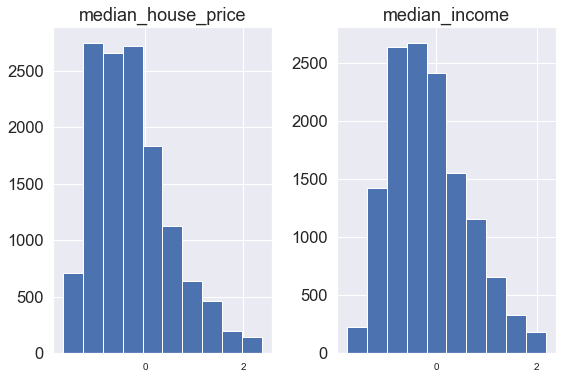

In [32]:
data_mi_mhp.hist(figsize=(9,6), xlabelsize = 10);

In [33]:
model_f = 'median_house_price ~ median_income'

model = smf.ols(formula=model_f, data=data_mi_mhp)
lm = model.fit()

In [34]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm.fittedvalues

# model residuals
model_residuals = lm.resid

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

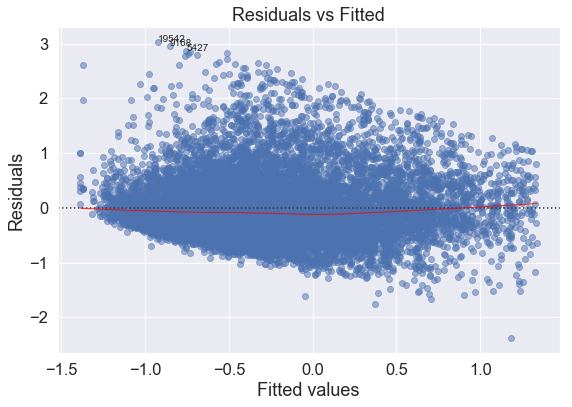

In [35]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(9)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'median_house_price', data=data_mi_mhp, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

In [36]:
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))
print("y_pred shape {} and size {}".format(y_pred.shape,y_test.size))

X_test shape (2648, 10) and size 26480
y_test shape (2648,) and size 2648
y_pred shape (2648,) and size 2648


#### Diagnosing Homoscedasticity

In [37]:
# Checking the presence of heteroscedasticity:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

bp = statsmodels.stats.diagnostic.het_breuschpagan(lm.resid, lm.model.exog)
bp

pd.DataFrame(name, bp)

,0
1.008947e+02,Lagrange multiplier statistic
9.700590e-24,p-value
1.016543e+02,f-value
8.058367e-24,f p-value


Tests are significant meaning that data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data.In another word, Since our p-value is less than 0.05, this indicates that heteroscedasticity is present, and we reject the null hypothesis of homoscedasticity. 

### Diagnosing Normality:

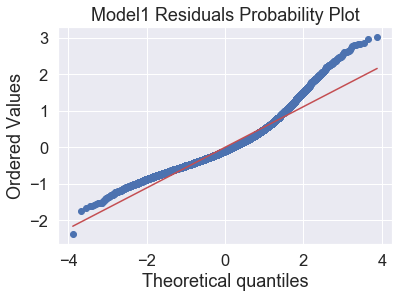

In [38]:
stats.probplot(lm.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot");

the residuals which will be represented as dots (in blue) should fall on the red line. This plot indicates that the model’s residuals are not normally distributed.

Kolmogorov-Smirnov test (for normality)

In [39]:
stats.kstest(lm.resid, 'norm')

KstestResult(statistic=0.18013219588398977, pvalue=0.0)

The test is significant which indicates that the model’s residuals are not normally distributed. REJECT the null hypothesis (that the residuals are normally distributed).

#### Ridge Regression:

In [41]:
# Grid Search for Algorithm Tuning
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid_ridge = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_ridge.fit(X_train, y_train)
print(grid_ridge)
# summarize the results of the grid search
print(grid_ridge.best_score_)
print(grid_ridge.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.6027608296726806
0.0


Best hyperparameter values for alpha are 0 and 1.

In [43]:
# For alpha=0.60:
Ridge_tuned=model.set_params(alpha=0.60)
scores=cross_val_score(Ridge_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7759813183911373


In [44]:
# For alpha = 0:
Ridge_tuned=model.set_params(alpha=1)
scores=cross_val_score(Ridge_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7759814141324934


In [45]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

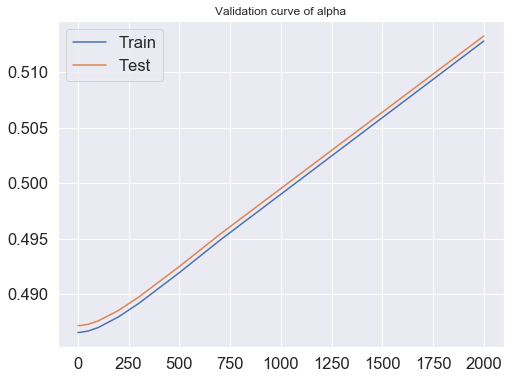

In [47]:
ridge=Ridge(random_state=42)
param_name='alpha'
param_range = [1,10,50,100,200,300,500,700,2000]
#param_range=[1,10,100,800,900,1000,1200,1400,1600,1800,2000]
#scoring='r2'
scoring='neg_mean_squared_error'
curve=validation_curve(ridge,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

n=len(param_range)
'''if scoring=='r2':
    train_score=[curve[0][i].mean() for i in range (0,n)]
    test_score=[curve[1][i].mean() for i in range (0,n)]
elif scoring=='neg_mean_squared_error':
    train_score=[np.sqrt(-curve[0][i].mean()) for i in range (0,n)]
    test_score=[np.sqrt(-curve[1][i].mean()) for i in range (0,n)]
    '''

plot_validation_curve(curve,param_range,param_name,scoring)


From above plot It can be seen that Train and Test scores are almost same for every values of alpha.
Even at alpha=0, difference between RMSE is not much, so there is no significant overfitting. 
As linear regression is not overfitting the model, using Ridge regression is not necessary.
There is no necessary of using Ridge Regression when there is no overfitting found in the linear regression.

In [49]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:3])
print(y_test[0:3])

2648
2648
[-0.18936124 -0.36516866 -0.48701588]
6117   -0.480583
7519   -0.909552
2649   -1.294325
Name: median_house_price, dtype: float64


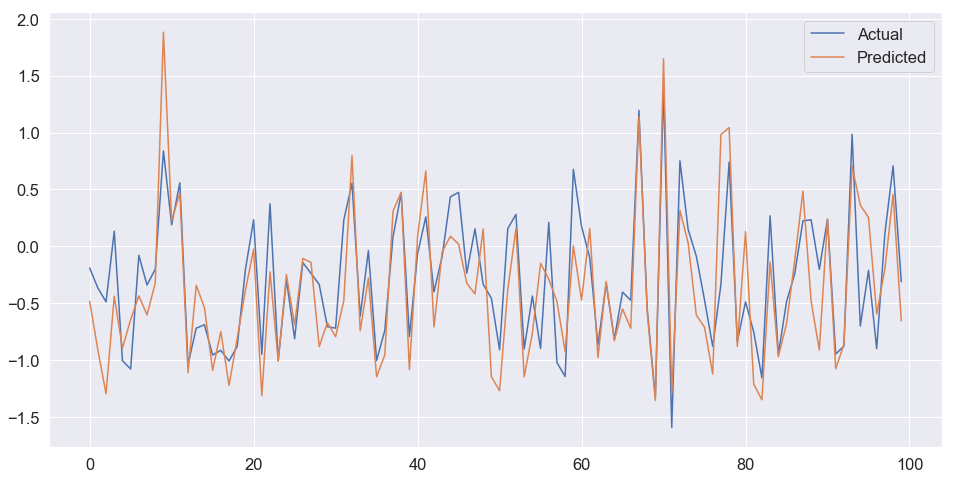

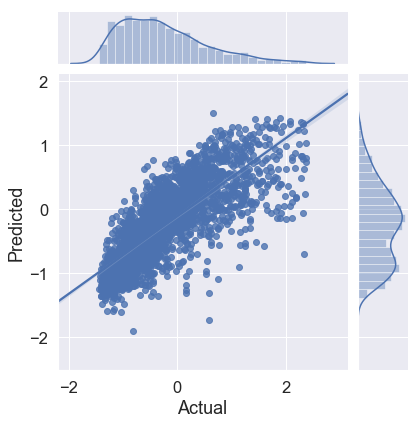

In [50]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [55]:
# Before dropping index:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
test.head()

,Predicted,Actual
6117,-0.189361,-0.480583
7519,-0.365169,-0.909552
2649,-0.487016,-1.294325
5564,0.133343,-0.437253
19676,-1.003898,-0.893087


In [56]:
# After dropping index:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
test.head()

,Predicted,Actual
0,-0.189361,-0.480583
1,-0.365169,-0.909552
2,-0.487016,-1.294325
3,0.133343,-0.437253
4,-1.003898,-0.893087


<Figure size 1152x576 with 0 Axes>

------END------